In [1]:
#Find the current working directory
import os
os.getcwd()

'C:\\Users\\Kenny'

In [2]:
#Change the directory: single forward slash or two backward slash
os.chdir('G:/1. Projects/KG - Live/Week_1/Data')

In [3]:
#Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [4]:
#Import sales data + taking a look at first five rows and all columns
df_sales = pd.read_csv('sales_Q12_2019.csv')
df_sales.head(5)

,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,...,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP,dealer_state,date
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,44610,California,2019-04-28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41505,California,2019-03-14
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,58890,California,2019-06-12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,51055,California,2019-03-04
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,70830,California,2019-01-23


In [5]:
#Cleaning data
df_sales.drop(columns=['dealer_state', 'date'], inplace=True)
df_sales.head()

,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,...,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44610
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41505
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,58890
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51055
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,70830


In [6]:
#Import prediction data + taking a look at first five rows and all columns
df_pred = pd.read_csv('sales_Q34_2019.csv')
df_pred.head(5)

,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,...,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,51355
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71580
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66790
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,72330
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,55370


# Regression Setup

In [7]:
#Complete for both sales and prediction data sets
def get_features_and_targets(df):
    temp = df.drop(columns = ['MSRP']).value_counts().reset_index(name="Count")
    y = temp.pop("Count").values
    X = temp.values
    return X,y

In [8]:
#Creating X,Y pairs for training and testing daa
X_train, y_train = get_features_and_targets(df_sales)
X_test, y_test = get_features_and_targets(df_pred)

#Confirming assumptions of shapes of arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(66, 73) (66,) (71, 73) (71,)


# Analytics

In [9]:
#Training and Test sets contain different numbers of "types" of cars; so dive into the data for analysis. 66 types in Train; 71 in Test.
#New models were introduced in test set and some may have been discontinued beginning in Q319

#Types of cars sold in either Q12, Q34, or both (Union problem)
X,y = get_features_and_targets(pd.concat([df_sales, df_pred]))
print(len(X))

#Models sold in both Q12 and Q34 -- A + B minus union of A/B
num_q12_and_q34 = len(y_train) + len(y_test) - len(y)
print(num_q12_and_q34)

#Cars sold in Q12 but not Q34
Q12_only = len(y_train) - num_q12_and_q34
print(Q12_only)

#Cars sold in Q34 but not Q12
Q34_only = len(y_test) - num_q12_and_q34
print(Q34_only)

80
57
9
14


Text(0.5, 1.0, 'Histogram of Quarterly Sales Proportions')

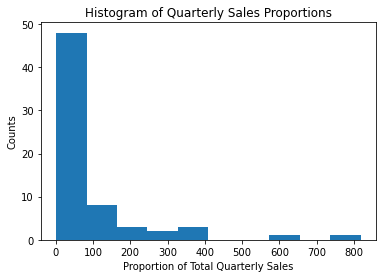

In [10]:
#Histogram of Quarterly Sales Proportions
plt.hist(y_train)
plt.xlabel('Proportion of Total Quarterly Sales')
plt.ylabel('Counts')
plt.title('Histogram of Quarterly Sales Proportions')

# Linear model with Gradient Descent

In [11]:
s_learning_rate = 0.001
s_max_iteration = 1000

#Hypothesis Function
def h(theta, X):
    return np.dot(X,theta)

#Loss Function
def loss(theta, X, y):
    return np.sum(np.square(y - h(theta, X))) / X.shape[0]

#Gradient of Hypothesis Function
def gradient(theta, X, y):
    return - 1 * np.dot(X.T, y - h(theta, X)) / X.shape[0]

def stochastic_gradient_descent(X, y, learning_rate, max_iteration, print_interval):
    theta = np.zeros((X.shape[1] + 1, 1))
    X_with_ones = np.hstack([np.ones([X.shape[0], 1]), X])  # prepend a column of 1's
    cost = np.zeros(max_iteration)  # initialize cost as array of zeros
    for i in range(max_iteration):
        for j in range(X.shape[0]):
            d_theta = gradient(theta, X_with_ones[j: j + 1, :], y[j: j + 1])
            theta = theta - learning_rate * d_theta
        cost[i] = loss(theta, X_with_ones, y) # Update the cost array for the current iteration
    if i % print_interval == 0 :
        print('iteration : ', i, ' loss : ', loss(theta, X_with_ones, y)) 
    return theta, cost

s_theta, s_cost = stochastic_gradient_descent(X_train, y_train, s_learning_rate, s_max_iteration, 100)

In [12]:
#Test Predictions for Gradient Descent
y_pred_GD = h(s_theta, np.hstack([np.ones([X_test.shape[0], 1]), X_test]))

# Since our target is non-negative, we set any negative predictions to 0.
y_pred_GD[y_pred_GD < 0] = 0

MSE= 5702.208265828383
R2= 0.6300187885391408


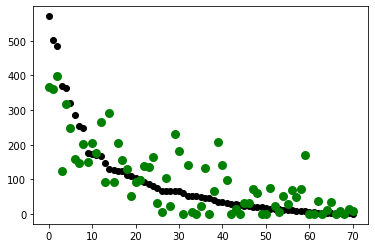

In [13]:
#Calculate MSE and R-squared score
print("MSE=", MSE(y_test, y_pred_GD))
print("R2=", r2_score(y_test, y_pred_GD))

#Visualize Predicted vs. Actual Test Labels
plt.scatter(range(len(y_test)), y_test,  color='black')
plt.scatter(range(len(y_pred_GD)), y_pred_GD, color='green', linewidth=3)

# Normal Equations

MSE= 6199.30366441952
R2= 0.5977653265103124


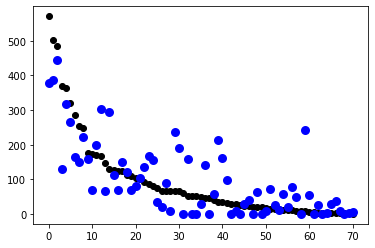

In [14]:
def normal_equations_solution(X, y):
    X_with_ones = np.hstack([np.ones([X.shape[0], 1]), X]) #Adding column of ones
    return np.dot(np.linalg.pinv(X_with_ones), y)

n_theta = normal_equations_solution(X_train, y_train)
y_pred_NE = h(n_theta, np.hstack([np.ones([X_test.shape[0], 1]), X_test]))

# Set any negative predictions to 0
y_pred_NE[y_pred_NE < 0] = 0

#Calculate MSE and R-squared score
print("MSE=", MSE(y_test, y_pred_NE))
print("R2=", r2_score(y_test, y_pred_NE))

plt.scatter(range(len(y_test)), y_test,  color='black')
plt.scatter(range(len(y_pred_NE)), y_pred_NE, color='blue', linewidth=3)

# Regularized Normal Equations 

In [15]:
#X_train is wider than it is tall; which suggests regularized normal equations might perform better
def regularized_normal_equations_solution(X, y, regularization_param):
    X_with_ones = np.hstack([np.ones([X.shape[0], 1]), X])
    return np.dot(
        np.linalg.inv(np.dot(X_with_ones.T, X_with_ones) + regularization_param * X.shape[0] * np.identity(X_with_ones.shape[1])),
        np.dot(X_with_ones.T, y))


In [16]:
regularization_params = np.linspace(0.001, 0.01, 10)

for regularization_param in regularization_params:
    theta_temp = regularized_normal_equations_solution(X_train, y_train, regularization_param)
    y_pred_N_reg = h(theta_temp, np.hstack([np.ones([X_test.shape[0], 1]), X_test]))
    y_pred_N_reg[y_pred_N_reg < 0] = 0
    print('For regularization parameter', regularization_param)
    print("MSE=", MSE(y_test, y_pred_N_reg))
    print("R2=", r2_score(y_test, y_pred_N_reg))
    print('-----')

For regularization parameter 0.001
MSE= 5920.159564029583
R2= 0.6158772697469941
-----
For regularization parameter 0.002
MSE= 5789.114544987633
R2= 0.6243799747764829
-----
For regularization parameter 0.003
MSE= 5715.4825544592795
R2= 0.6291575016201112
-----
For regularization parameter 0.004
MSE= 5682.239632463352
R2= 0.6313144303009275
-----
For regularization parameter 0.005
MSE= 5674.8666628183155
R2= 0.6317928169389044
-----
For regularization parameter 0.006
MSE= 5682.3563700743125
R2= 0.6313068559155818
-----
For regularization parameter 0.007
MSE= 5698.577977735182
R2= 0.6302543355981151
-----
For regularization parameter 0.008
MSE= 5719.786363627024
R2= 0.6288782539224569
-----
For regularization parameter 0.009000000000000001
MSE= 5745.232444099362
R2= 0.62722721431794
-----
For regularization parameter 0.01
MSE= 5773.6156082274465
R2= 0.6253856054254462
-----


# Generalized Linear Models

In [17]:
X_train_with_ones = sm.add_constant(X_train)
glm = sm.GLM(y_train, X_train_with_ones, family=sm.families.Gaussian()) #Option to use Gaussian, Gamma, Logit, etc for Error.
glm_results = glm.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   66
Model:                            GLM   Df Residuals:                       35
Model Family:                Gaussian   Df Model:                           30
Link Function:               identity   Scale:                          17327.
Method:                          IRLS   Log-Likelihood:                -394.77
Date:                Wed, 27 Jul 2022   Deviance:                   6.0590e+05
Time:                        08:18:48   Pearson chi2:                 6.06e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6077     49.771      1.720      0.0

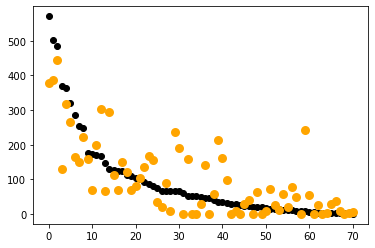

In [18]:
y_pred_GLM = glm_results.predict(sm.add_constant(X_test))
y_pred_GLM[y_pred_GLM < 0] = 0 #Set negative predictions to 0

plt.scatter(range(len(y_test)), y_test,  color='black')
plt.scatter(range(len(y_pred_GLM)), y_pred_GLM, color='orange', linewidth=3)

# Random Forests Regression

MSE= 4308.133720398956
R2= 0.720471708730718


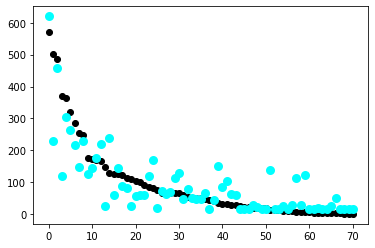

In [19]:
#Relevant parameters are max_depth of the trees and random_state (for same results)
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, y_train)

y_pred_RF = regr.predict(X_test)
y_pred_RF[y_pred_RF < 0] = 0 #Set negative predictions to 0

#Calculate MSE and R-squared
print("MSE=", MSE(y_test, y_pred_RF))
print("R2=", r2_score(y_test, y_pred_RF))

plt.scatter(range(len(y_test)), y_test,  color='black')
plt.scatter(range(len(y_pred_RF)), y_pred_RF, color='cyan', linewidth=3)

# Comparing Models

In [20]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>



|Method      |RMSE             |R2               |
|------------|-----------------|-----------------|
| Gradient Descent | 5702 | 0.630|
| Normal Equations | 6199 | 0.598 |
| Regularized Normal Equations | 5674 | 0.632 |
| Generalized Linear Model (GLM) | 6199 | 0.598 |
| Random Forests | 4308 | 0.720 |

On my particular run of these algorithms, the ranking of the best fits was:

1. Random Forests
2. Regularized Normal Equations
3. Gradient Descent
4. GLM & Normal Equations tied for last

GLM and Normal Equations produce the same results because I  used a gaussian model for the error. When we use a gaussian model for the error, GLM, **is** linear regression. GLM, however, provides a generalization where we can implement different error models for our data. I could change the ``family`` parameter of the GLM module to see if I can generate any better model fits.